In [98]:
#import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline



UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

### data gathring:


In [ ]:
#Read in the dataset and take a look at the top few rows here:
df = pd.read_csv('./tmdb-movies.csv')
df.head()

### data assessing and cleaning:

In [99]:
#Find the number of rows and columns in the dataset.
df.shape

(10866, 21)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [101]:
#drop unwanted columns: 
#imdb_id/ cast/ homepage/ tagline/ overview/ production_companies/ release_date/
df2=df.drop(["imdb_id", "cast","homepage", "tagline","keywords", "overview", "production_companies"],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [102]:
#correct the wrong data type to a propper type
df2['budget']= df['budget'].apply(np.float)
df2['revenue']= df['revenue'].apply(np.float)
df2['release_date']= pd.to_datetime(df['release_date'])

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null float64
revenue           10866 non-null float64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null datetime64[ns]
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(4), object(3)
memory usage: 1.2+ MB


In [103]:
df2['year']=df2['release_date'].dt.year


In [104]:
df2['year']

0        2015
1        2015
2        2015
3        2015
4        2015
5        2015
6        2015
7        2015
8        2015
9        2015
10       2015
11       2015
12       2015
13       2015
14       2015
15       2015
16       2015
17       2015
18       2015
19       2015
20       2015
21       2015
22       2015
23       2015
24       2015
25       2015
26       2015
27       2015
28       2015
29       2015
         ... 
10836    2066
10837    2066
10838    2066
10839    2066
10840    2066
10841    2066
10842    2066
10843    2066
10844    2066
10845    2066
10846    2066
10847    2066
10848    2066
10849    2066
10850    2066
10851    2066
10852    2066
10853    2066
10854    2066
10855    2066
10856    2066
10857    2066
10858    2066
10859    2066
10860    2066
10861    2066
10862    2066
10863    2066
10864    2066
10865    2066
Name: year, Length: 10866, dtype: int64

In [105]:
#How many missing values in the dataset? 
df2.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
year               0
dtype: int64

In [106]:
#drop null values
df2.dropna(axis = 0,inplace = True)

In [107]:
df2.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
year              0
dtype: int64

In [108]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 15 columns):
id                10801 non-null int64
popularity        10801 non-null float64
budget            10801 non-null float64
revenue           10801 non-null float64
original_title    10801 non-null object
director          10801 non-null object
runtime           10801 non-null int64
genres            10801 non-null object
release_date      10801 non-null datetime64[ns]
vote_count        10801 non-null int64
vote_average      10801 non-null float64
release_year      10801 non-null int64
budget_adj        10801 non-null float64
revenue_adj       10801 non-null float64
year              10801 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(5), object(3)
memory usage: 1.3+ MB


In [109]:
#how many diplicated rows?
sum(df2.duplicated())


1

In [110]:
#drop diplicated rows
df2.drop_duplicates(inplace=True)
sum(df2.duplicated())

0

In [111]:
#splitting genres column:
df2['genres']=df['genres'].str.split('|', 1,expand=True)
df2.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,Action,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,2015


In [112]:
df2.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,year
count,10800.000000,10800.000000,1.080000e+04,1.080000e+04,10800.000000,10800.000000,10800.000000,10800.000000,1.080000e+04,1.080000e+04,10800.000000
mean,65576.183426,0.649455,1.471114e+07,4.006558e+07,102.189722,218.600741,5.970880,2001.289537,1.765437e+07,5.167714e+07,2004.632130
std,91756.079939,1.002441,3.098677e+07,1.173193e+08,30.783873,577.165055,0.933006,12.819545,3.438403e+07,1.450182e+08,15.572964
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,1970.000000
25%,10570.500000,0.209157,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,1996.000000
50%,20460.000000,0.385471,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,2006.000000
75%,74725.250000,0.717508,1.564374e+07,2.455409e+07,111.250000,147.000000,6.600000,2011.000000,2.103337e+07,3.408743e+07,2012.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2069.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


## Question 1:

## What is the movie with most revenue by year?

In [116]:
revCount = df2.groupby(['year'])['revenue'].sum()

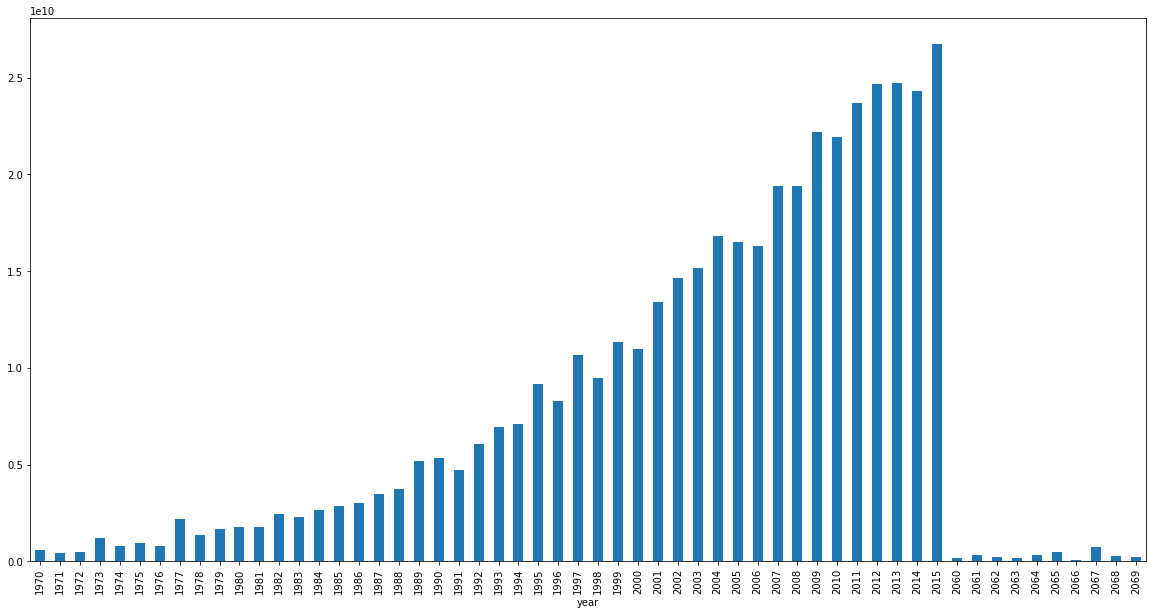

In [118]:
revCount.plot(kind = 'bar', figsize=(20,10) )

Finding:

## Question2 :

## What is the genres with highest rating?

In [119]:
vGenres = df2.groupby(['genres'])['vote_average'].mean()

Finding:

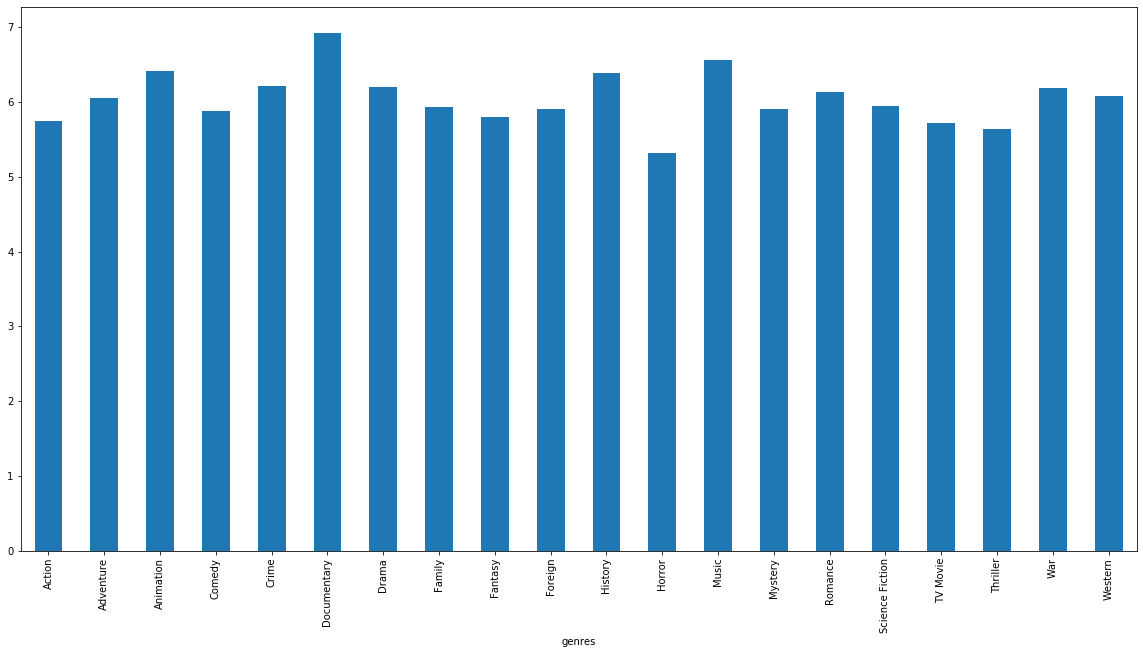

In [120]:
vGenres.plot(kind = 'bar', figsize=(20,10) )

## Question3:

In [124]:
x = df2['director'].value_counts()
x = x.head(10)

In [125]:
x

Woody Allen          45
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           19
Name: director, dtype: int64

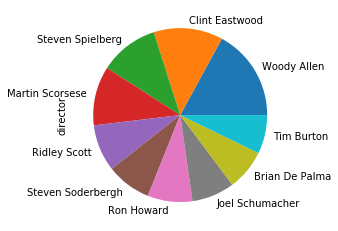

In [127]:
x.plot.pie()

Finding:

# Conclusion:

In [14]:
#export the dataframe to csv file: